In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%config InlineBackend.figure_format = 'retina'

In [3]:
def Aerofoil(x):
    '''This function takes the x coordinate and returns the positive y coordinate of the aerofoil'''
    t=0.20
    y = (5*t)*((0.2969*x**0.5)-(0.1260*x)-(0.3516*x**2)+(0.2843*x**3)-(0.1015*x**4))
    return(y)

length = 0.063 # legth of the foil in ansys

In [4]:
def get_difference(filename):
    """
    gets the difference in pressure between the upper and lower surfaces
    """
    c_pupper=[[],[]]
    c_plower=[[],[]]
    append_to_lower = True

    top = True
    with open(f"./results 2/pressure data/{filename}") as file:
        for line in file:
            line = line.rstrip()
            try:
                int(line[-1])
                data=line.split()
                if top:

                    c_plower[0].append(float(data[0]))
                    c_plower[1].append(float(data[1]))
                else:
                    c_pupper[0].append(float(data[0]))
                    c_pupper[1].append(float(data[1]))
                top = not(top)
            except:
                continue


    diff = [-abs(c_plower[1][i] - c_pupper[1][i]) for i in range(len(c_pupper[1]))]
    return diff, c_pupper, c_plower

def expected(basename):
    """
    gets the c_l and c_d from ansys, can be used to compare to
    """
    with open(f"./results 2/convergence/{basename}_lift") as file:
        text = file.read().rsplit()
        lift = text[-1]

    with open(f"./results 2/convergence/{basename}_drag") as file:
        text = file.read().rsplit()
        drag = text[-1]
    return lift, drag

def c_l(alpha):
    """
    gets the cl with 1 refinement
    """
    diff, c_pupper, c_plower = get_difference(f"{alpha}deg1ref")
    factor = 1
    if alpha > 0:
        factor = -1
    return np.trapz(diff, c_pupper[0])/length * factor

In [5]:
c_l(4)

0.3286238405846554

In [6]:
lift, drag = expected("-2deg1ref")
print(f"expected c_l: {lift}\nexpected c_d: {drag}")

expected c_l: -0.1555681148117014
expected c_d: 0.02040637646509488


-0.6156221720594234

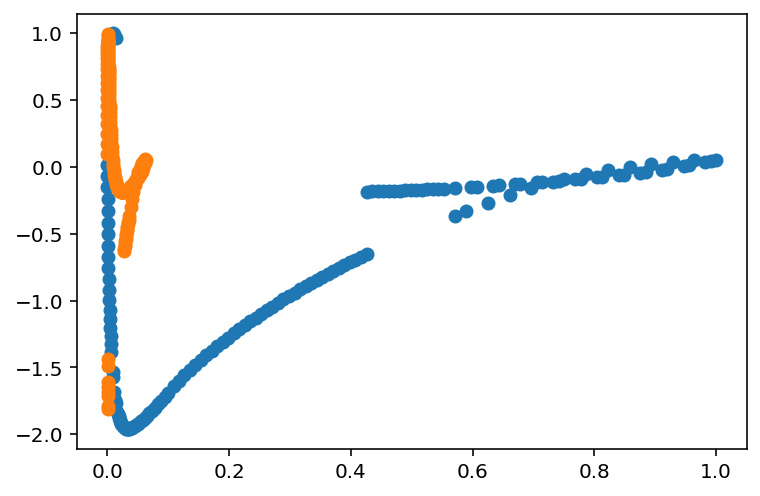

In [7]:
diff, c_pupper, c_plower = get_difference("8deg1ref")
plt.scatter([c_pupper[0][i]/0.063 for i in range(len(c_pupper[0]))], c_pupper[1])
plt.scatter(c_plower[0], c_plower[1])
np.trapz(diff, c_pupper[0])/length

In [8]:
ansys_alphas = [-4, -2, 0, 2, 4, 8, 10, 14]
ansys_cls = [float(expected(f"{alpha}deg1ref")[0]) for alpha in ansys_alphas]
ansys_cds = [float(expected(f"{alpha}deg1ref")[1]) for alpha in ansys_alphas]

In [9]:
ansys_cds

[0.02163896407198369,
 0.02040637646509488,
 0.02001582995744749,
 0.02040497708678205,
 0.02163752421745163,
 0.02776937090037726,
 0.7086678555215288,
 0.06436604419513117]